In [1]:
## importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

In [2]:
## Loading data
# df = pd.read_csv('/tmp/breach-prediction-dataset_MW_pandas_2.csv')

df = pd.read_csv('breach-prediction-dataset_MW_pandas_2.csv')

df.head()

,date,month,day,region,datacenter,service,pipeline_code,pod,pod_vers,cluster,...,vms_net_30d,cpu_util_perc,mem_util_perc,breach,breach_reason,breach_date,total_days_before_breach,days_until_breach,90d_breach,days_since_breach
0,10/13/2017,10,13,1,10,4,2,3,2,13,...,-21.0,0.3570,0.5736,0,NaN,1511222400,498,39,1,NaN
1,10/13/2017,10,13,1,10,11,6,3,2,16,...,23.0,0.0691,0.5143,0,NaN,1509753600,173,22,1,NaN
2,10/13/2017,10,13,1,10,11,6,3,2,14,...,4.0,0.1695,0.5159,0,NaN,1513987200,530,71,1,NaN
3,10/13/2017,10,13,2,2,4,2,5,2,21,...,14.0,0.0376,0.1436,0,NaN,1526860800,641,220,0,NaN
4,10/13/2017,10,13,2,2,11,6,5,2,23,...,7.0,0.0284,0.2973,0,NaN,1520985600,572,152,0,NaN


In [3]:
df.shape

(4978, 46)

In [4]:
cats = [col for col in df.columns.values if df[col].dtype == 'object']

In [5]:
cats

['date']

In [6]:
# dforg = pd.read_csv('/tmp/breach-prediction-dataset_MW_pandas_2.csv')

In [7]:
# dforg = pd.read_csv('/tmp/breach-prediction-dataset_MW_pandas_2.csv')

dforg = pd.read_csv('breach-prediction-dataset_MW_pandas_2.csv')
dforg.head()

,date,month,day,region,datacenter,service,pipeline_code,pod,pod_vers,cluster,...,vms_net_30d,cpu_util_perc,mem_util_perc,breach,breach_reason,breach_date,total_days_before_breach,days_until_breach,90d_breach,days_since_breach
0,10/13/2017,10,13,1,10,4,2,3,2,13,...,-21.0,0.3570,0.5736,0,NaN,1511222400,498,39,1,NaN
1,10/13/2017,10,13,1,10,11,6,3,2,16,...,23.0,0.0691,0.5143,0,NaN,1509753600,173,22,1,NaN
2,10/13/2017,10,13,1,10,11,6,3,2,14,...,4.0,0.1695,0.5159,0,NaN,1513987200,530,71,1,NaN
3,10/13/2017,10,13,2,2,4,2,5,2,21,...,14.0,0.0376,0.1436,0,NaN,1526860800,641,220,0,NaN
4,10/13/2017,10,13,2,2,11,6,5,2,23,...,7.0,0.0284,0.2973,0,NaN,1520985600,572,152,0,NaN


In [8]:
df.columns

Index([u'date', u'month', u'day', u'region', u'datacenter', u'service',
       u'pipeline_code', u'pod', u'pod_vers', u'cluster', u'cluster_age',
       u'avg_vm_age', u'vm_count_ccr', u'vc_vm_count', u'opthresh',
       u'otis_opstat', u'vra_opstat', u'ccr_opstat', u'storage_growth_rate30d',
       u'esx_hosts', u'cpu_cores', u'cpu_threads', u'memory_gb', u'total_vms',
       u'expired_vms', u'vms_on', u'vms_off', u'vm_density', u'vms_added_1d',
       u'vms_removed_1d', u'vms_net_1d', u'vms_added_7d', u'vms_removed_7d',
       u'vms_net_7d', u'vms_added_30d', u'vms_removed_30d', u'vms_net_30d',
       u'cpu_util_perc', u'mem_util_perc', u'breach', u'breach_reason',
       u'breach_date', u'total_days_before_breach', u'days_until_breach',
       u'90d_breach', u'days_since_breach'],
      dtype='object')

In [9]:
df.dtypes

date                         object
month                         int64
day                           int64
region                        int64
datacenter                    int64
service                       int64
pipeline_code                 int64
pod                           int64
pod_vers                      int64
cluster                       int64
cluster_age                   int64
avg_vm_age                    int64
vm_count_ccr                  int64
vc_vm_count                   int64
opthresh                    float64
otis_opstat                 float64
vra_opstat                  float64
ccr_opstat                  float64
storage_growth_rate30d      float64
esx_hosts                   float64
cpu_cores                   float64
cpu_threads                 float64
memory_gb                   float64
total_vms                   float64
expired_vms                 float64
vms_on                      float64
vms_off                     float64
vm_density                  

In [10]:
df["90d_breach"].value_counts()

1    3092
0    1886
Name: 90d_breach, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 46 columns):
date                        4978 non-null object
month                       4978 non-null int64
day                         4978 non-null int64
region                      4978 non-null int64
datacenter                  4978 non-null int64
service                     4978 non-null int64
pipeline_code               4978 non-null int64
pod                         4978 non-null int64
pod_vers                    4978 non-null int64
cluster                     4978 non-null int64
cluster_age                 4978 non-null int64
avg_vm_age                  4978 non-null int64
vm_count_ccr                4978 non-null int64
vc_vm_count                 4978 non-null int64
opthresh                    4978 non-null float64
otis_opstat                 4341 non-null float64
vra_opstat                  0 non-null float64
ccr_opstat                  2245 non-null float64
storage_growth_rate30d 

In [12]:
df.describe()

,month,day,region,datacenter,service,pipeline_code,pod,pod_vers,cluster,cluster_age,...,vms_net_30d,cpu_util_perc,mem_util_perc,breach,breach_reason,breach_date,total_days_before_breach,days_until_breach,90d_breach,days_since_breach
count,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,...,4343.000000,4978.000000,4978.000000,4978.0,0.0,4.978000e+03,4978.000000,4978.000000,4978.000000,0.0
mean,6.027320,15.216754,3.572117,5.901366,6.697067,4.271796,17.210928,2.449578,102.066894,258.551627,...,33.089109,0.135602,0.392515,0.0,NaN,1.523468e+09,335.866412,77.314785,0.621133,NaN
std,4.317756,8.442969,0.865081,3.209094,3.713174,2.901686,7.803295,0.590910,54.012692,168.599709,...,67.286158,0.114960,0.196692,0.0,NaN,4.796515e+06,169.099551,54.321574,0.485154,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,10.000000,...,-130.000000,0.000000,0.000000,0.0,NaN,1.507939e+09,64.000000,1.000000,0.000000,NaN
25%,2.000000,8.000000,4.000000,3.000000,4.000000,2.000000,12.000000,2.000000,54.000000,119.000000,...,0.000000,0.051100,0.252850,0.0,NaN,1.520986e+09,205.000000,31.000000,0.000000,NaN
50%,4.000000,15.000000,4.000000,6.000000,4.000000,2.000000,17.000000,3.000000,99.000000,205.000000,...,2.000000,0.115150,0.438850,0.0,NaN,1.523750e+09,291.000000,68.000000,1.000000,NaN
75%,11.000000,22.000000,4.000000,8.000000,11.000000,6.000000,23.000000,3.000000,141.000000,401.000000,...,39.000000,0.185275,0.570000,0.0,NaN,1.526861e+09,486.000000,116.000000,1.000000,NaN
max,12.000000,31.000000,4.000000,11.000000,13.000000,10.000000,29.000000,3.000000,182.000000,719.000000,...,701.000000,0.645000,0.650000,0.0,NaN,1.531181e+09,721.000000,247.000000,1.000000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 46 columns):
date                        4978 non-null object
month                       4978 non-null int64
day                         4978 non-null int64
region                      4978 non-null int64
datacenter                  4978 non-null int64
service                     4978 non-null int64
pipeline_code               4978 non-null int64
pod                         4978 non-null int64
pod_vers                    4978 non-null int64
cluster                     4978 non-null int64
cluster_age                 4978 non-null int64
avg_vm_age                  4978 non-null int64
vm_count_ccr                4978 non-null int64
vc_vm_count                 4978 non-null int64
opthresh                    4978 non-null float64
otis_opstat                 4341 non-null float64
vra_opstat                  0 non-null float64
ccr_opstat                  2245 non-null float64
storage_growth_rate30d 

In [14]:
# selecting just continuous variables
df_subset = df[['days_until_breach','90d_breach','day','cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','vm_density','vms_added_1d','vms_removed_1d','vms_net_1d','vms_added_7d','vms_removed_7d','vms_net_7d','vms_added_30d','vms_removed_30d','cpu_util_perc','mem_util_perc']]

In [15]:
#plt.figure(figsize=(20, 15))
#sns.heatmap(df_subset.corr(), annot=True, fmt=".2f")

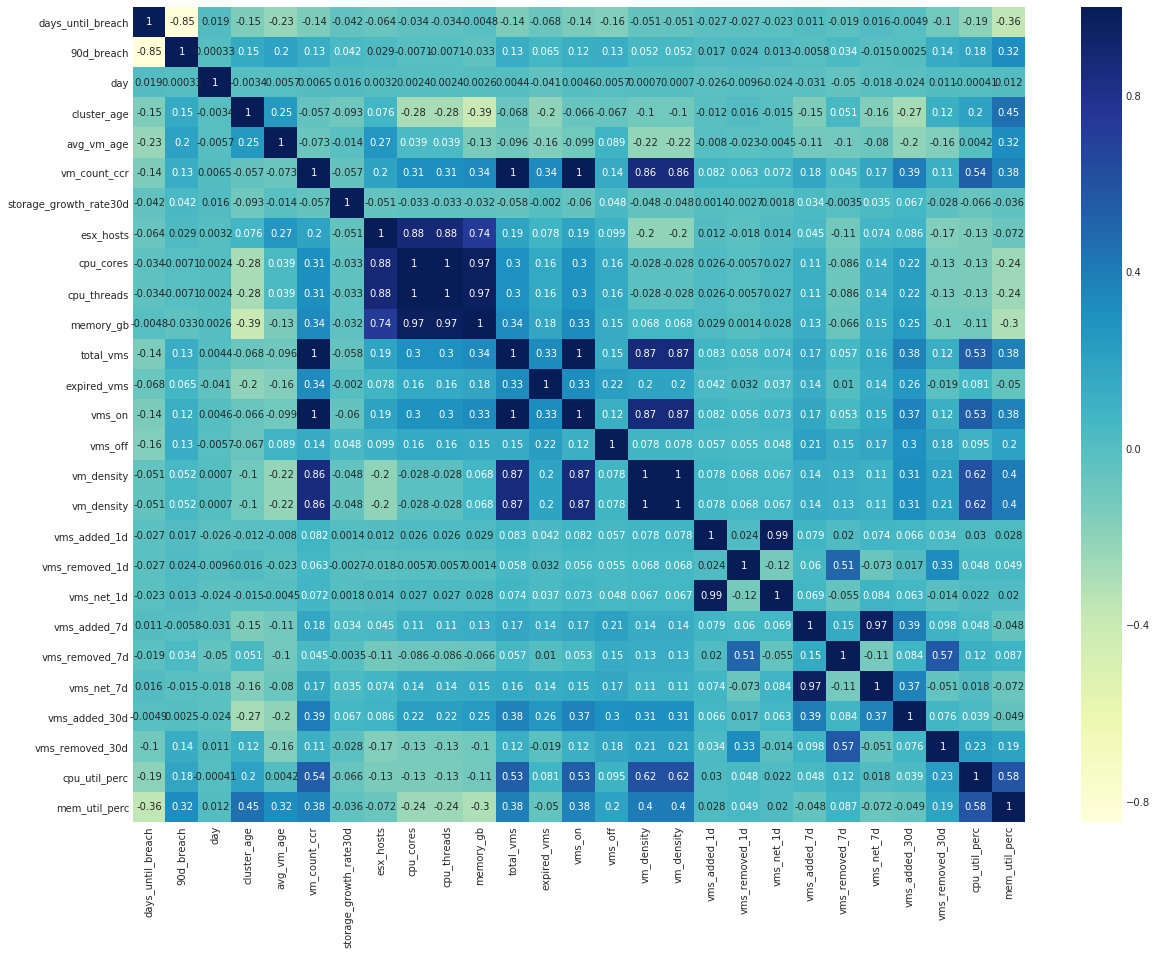

In [16]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_subset.corr(), annot=True, cmap="YlGnBu")

In [17]:
#plt.figure(figsize=(20, 15))
#sns.heatmap(df_subset.corr(), annot=True, cmap="Blues")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 46 columns):
date                        4978 non-null object
month                       4978 non-null int64
day                         4978 non-null int64
region                      4978 non-null int64
datacenter                  4978 non-null int64
service                     4978 non-null int64
pipeline_code               4978 non-null int64
pod                         4978 non-null int64
pod_vers                    4978 non-null int64
cluster                     4978 non-null int64
cluster_age                 4978 non-null int64
avg_vm_age                  4978 non-null int64
vm_count_ccr                4978 non-null int64
vc_vm_count                 4978 non-null int64
opthresh                    4978 non-null float64
otis_opstat                 4341 non-null float64
vra_opstat                  0 non-null float64
ccr_opstat                  2245 non-null float64
storage_growth_rate30d 

In [19]:
df_subset.isnull().sum()

days_until_breach           0
90d_breach                  0
day                         0
cluster_age                 0
avg_vm_age                  0
vm_count_ccr                0
storage_growth_rate30d    635
esx_hosts                 635
cpu_cores                 635
cpu_threads               635
memory_gb                 635
total_vms                 635
expired_vms               635
vms_on                    635
vms_off                   635
vm_density                635
vm_density                635
vms_added_1d              635
vms_removed_1d            635
vms_net_1d                635
vms_added_7d              635
vms_removed_7d            635
vms_net_7d                635
vms_added_30d             635
vms_removed_30d           635
cpu_util_perc               0
mem_util_perc               0
dtype: int64

In [20]:
df_subset = df_subset.dropna()

In [21]:
df_subset.isnull().sum()

days_until_breach         0
90d_breach                0
day                       0
cluster_age               0
avg_vm_age                0
vm_count_ccr              0
storage_growth_rate30d    0
esx_hosts                 0
cpu_cores                 0
cpu_threads               0
memory_gb                 0
total_vms                 0
expired_vms               0
vms_on                    0
vms_off                   0
vm_density                0
vm_density                0
vms_added_1d              0
vms_removed_1d            0
vms_net_1d                0
vms_added_7d              0
vms_removed_7d            0
vms_net_7d                0
vms_added_30d             0
vms_removed_30d           0
cpu_util_perc             0
mem_util_perc             0
dtype: int64

In [22]:
# create X (features) and y (response)
feature_cols = ['cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']
X = df_subset[feature_cols]
y =  df_subset['90d_breach']

In [23]:
X.shape

(4343, 16)

In [24]:
y.value_counts()

1    2598
0    1745
Name: 90d_breach, dtype: int64

In [25]:
# compute null accuracy manually
print (y.mean())
print (1 - y.mean())

0.5982040064471563
0.4017959935528437


In [26]:
## Training and testing set
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78978)

In [27]:
print (df_subset.shape)
print (X_train.shape)
print (X_test.shape)

(4343, 27)
(3474, 16)
(869, 16)


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4343 entries, 0 to 4977
Data columns (total 16 columns):
cluster_age               4343 non-null int64
avg_vm_age                4343 non-null int64
vm_count_ccr              4343 non-null int64
storage_growth_rate30d    4343 non-null float64
esx_hosts                 4343 non-null float64
cpu_cores                 4343 non-null float64
cpu_threads               4343 non-null float64
memory_gb                 4343 non-null float64
total_vms                 4343 non-null float64
expired_vms               4343 non-null float64
vms_on                    4343 non-null float64
vms_off                   4343 non-null float64
vm_density                4343 non-null float64
vm_density                4343 non-null float64
cpu_util_perc             4343 non-null float64
mem_util_perc             4343 non-null float64
dtypes: float64(13), int64(3)
memory usage: 736.8 KB


In [29]:
df_subset.isnull().sum()

days_until_breach         0
90d_breach                0
day                       0
cluster_age               0
avg_vm_age                0
vm_count_ccr              0
storage_growth_rate30d    0
esx_hosts                 0
cpu_cores                 0
cpu_threads               0
memory_gb                 0
total_vms                 0
expired_vms               0
vms_on                    0
vms_off                   0
vm_density                0
vm_density                0
vms_added_1d              0
vms_removed_1d            0
vms_net_1d                0
vms_added_7d              0
vms_removed_7d            0
vms_net_7d                0
vms_added_30d             0
vms_removed_30d           0
cpu_util_perc             0
mem_util_perc             0
dtype: int64

In [30]:
# create X (features) and y (response)
feature_cols = ['cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']
X = df_subset[feature_cols]
y =  df_subset['90d_breach']

In [31]:
features = df_subset [['90d_breach','cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']]

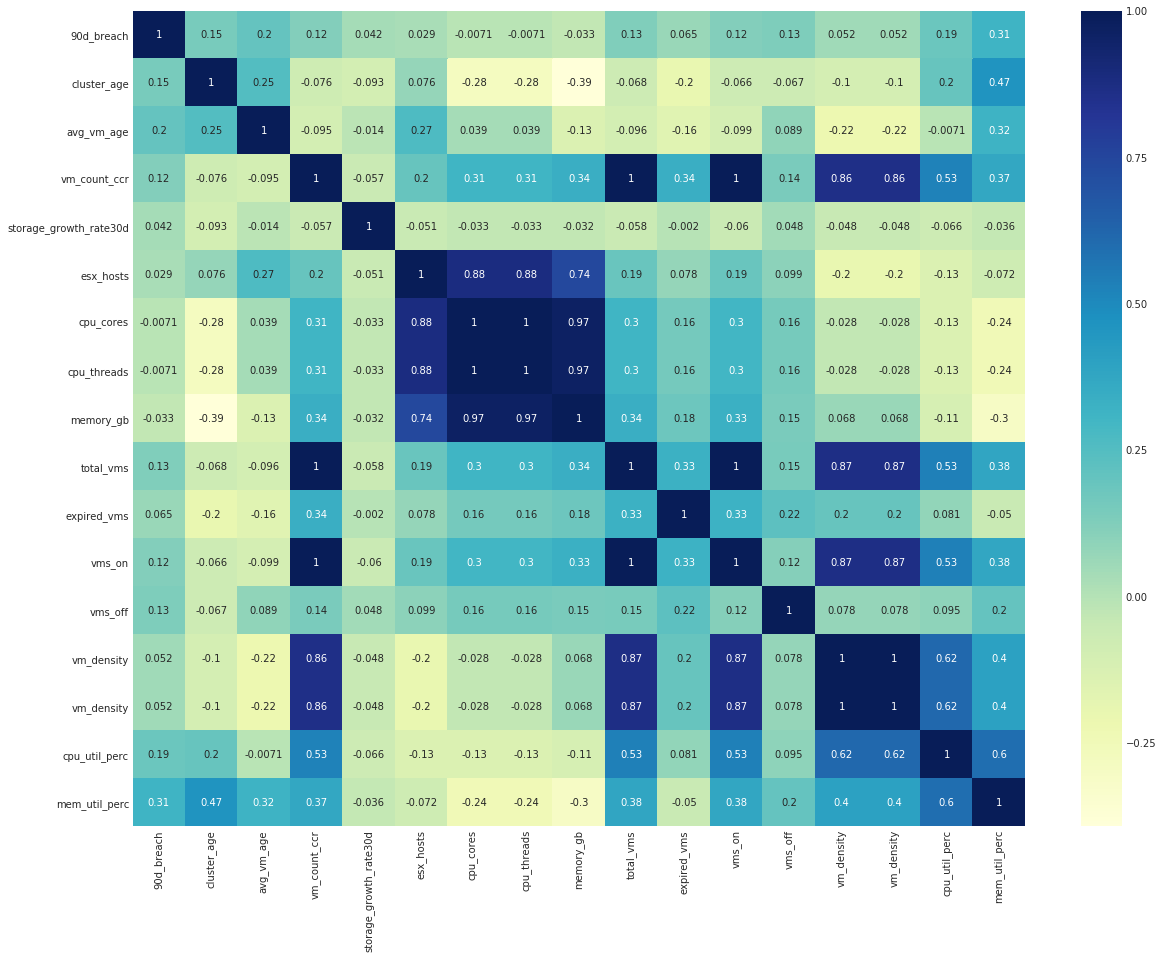

In [32]:
plt.figure(figsize=(20, 15))
#sns.heatmap(features.corr(), annot=True, fmt=".2f")
sns.heatmap(features.corr(), annot=True, cmap="YlGnBu")

In [33]:
features2 = df_subset [['days_until_breach','90d_breach','cluster_age','avg_vm_age','vm_count_ccr','total_vms','vms_on','vms_off','cpu_util_perc','mem_util_perc']]

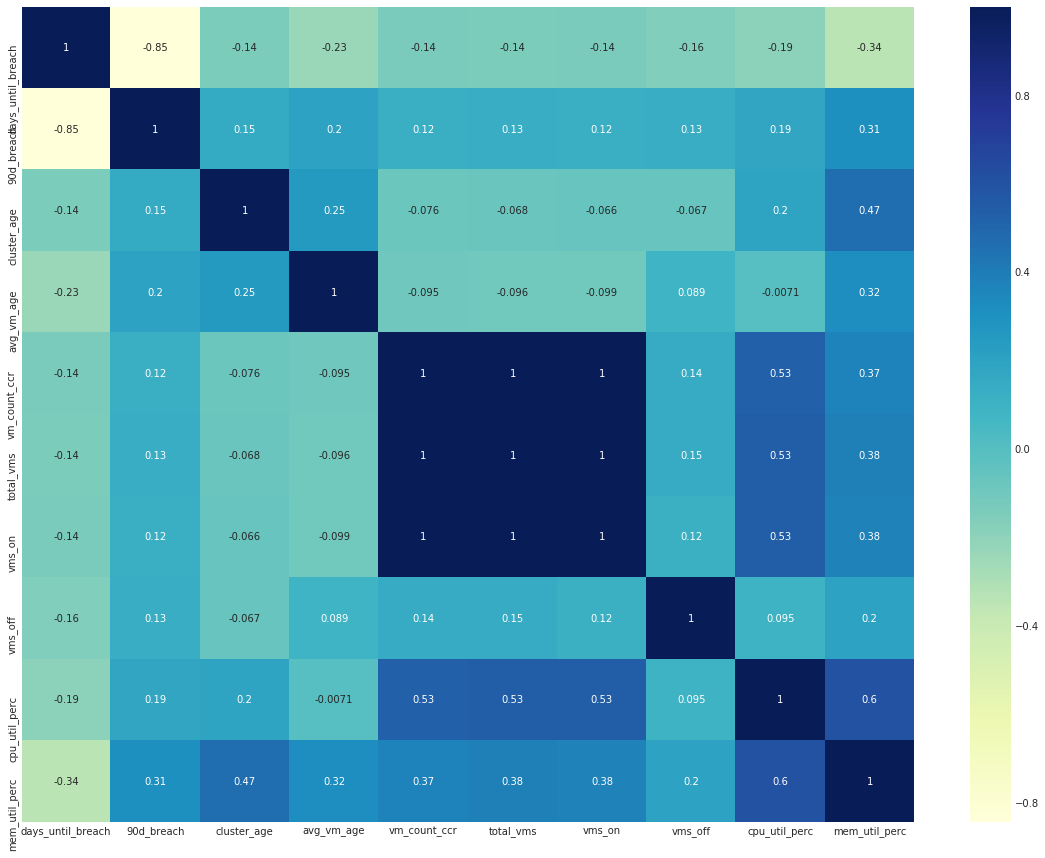

In [34]:
plt.figure(figsize=(20, 15))
sns.heatmap(features2.corr(), annot=True, cmap="YlGnBu")

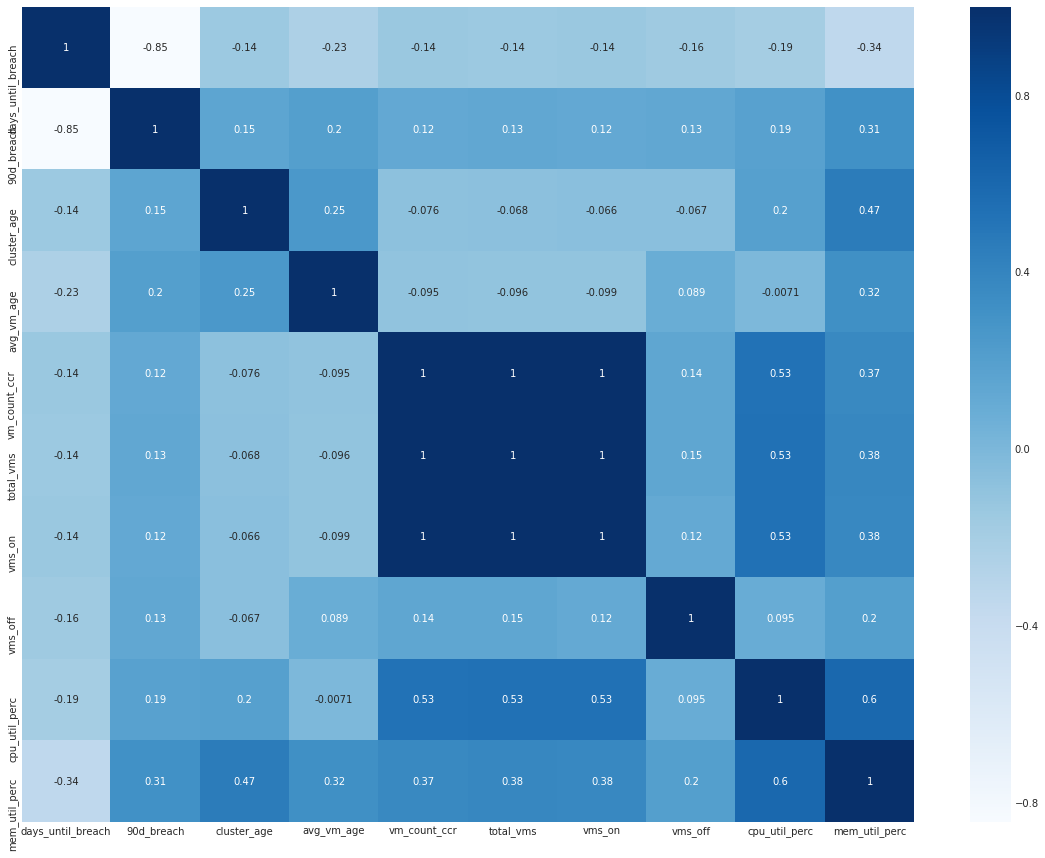

In [35]:
plt.figure(figsize=(20, 15))
sns.heatmap(features2.corr(), annot=True, cmap="Blues")

In [36]:
g = sns.FacetGrid(features, row='90d_breach', col='mem_util_perc')
g.map(sns.distplot, "avg_vm_age")
sns.plt.show()

ValueError: Image size of 577368x432 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 577368x432 pixels is too large. It must be less than 2^16 in each direction.

In [37]:
# create X (features) and y (response)
feature_cols = ['cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']
X = df_subset[feature_cols]
y =  df_subset['90d_breach']

In [126]:
# create X (features) and y (response)
feature_cols = ['cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']
X8 = df_subset[feature_cols]
y8 =  df_subset['90d_breach']

In [127]:
# Split fo rtrain and test set

# create X (features) and y (response)
feature_cols = ['cluster_age','avg_vm_age','vm_count_ccr','storage_growth_rate30d','esx_hosts','cpu_cores','cpu_threads','memory_gb', 'total_vms','expired_vms','vms_on','vms_off','vm_density','cpu_util_perc','mem_util_perc']
X8 = df_subset[feature_cols]
y8 =  df_subset['90d_breach']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.2, random_state=78978)

In [128]:
# 10-fold cross-validation with logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.7161258847061394


In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(logreg,X,y,cv=10)
conf_mat = confusion_matrix(y,y_pred)

In [130]:
print(conf_mat)

[[1014  731]
 [ 502 2096]]


In [133]:
# http://scikit-learn.org/stable/modules/cross_validation.html
def kfolds_val_mw(X,y,test_size_par,random_state_par,kfold,model_m,parameters=None):
    
    print(X_train.shape)
    print(X_test.shape)
    
    if (model_m ==  'LogReg'):
        model_mm = LogisticRegression(C=1e9)   
    elif (model_m ==  'knn'):
        model_mm = KNeighborsClassifier(n_neighbors=parameters['n_neighbors'])   
    elif (model_m ==  'DecTree'):
        model_mm = DecisionTreeClassifier(max_depth=parameters['max_depth'], random_state=parameters['random_state'])  
    elif (model_m ==  'GaussNaiveBayes'):
        #model_mm = MultinomialNB()   
        model_mm = GaussianNB()
    elif (model_m ==  'MultiNaiveBayes'):
        model_mm = MultinomialNB()
    elif (model_m ==  'RandomForest'):
        model_mm = RandomForestClassifier()       
    elif (model_m ==  'SVM'):
        model_mm = svm.SVC()     
    else:
        raise AssertionError('Unrecognized model. Allowed models: "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #raise AssertionError('{model_m} wrong, use "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #print('this is wrong')

   
    cv = ShuffleSplit(n_splits=kfold, test_size=test_size_par, random_state=random_state_par)
   
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='accuracy').mean())
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='precision').mean())
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='recall').mean()) #sensitivity
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='roc_auc').mean())
    
    #y_pred = cross_val_predict(model_mm,X,y,cv=cv)
    #conf_mat = confusion_matrix(y,y_pred)
    #print(conf_matrix)

In [132]:
# http://scikit-learn.org/stable/modules/cross_validation.html
def kfolds_val_cv_mw(X,y,cv,model_m,parameters=None):
    
    print(X_train.shape)
    print(X_test.shape)
    
    if (model_m ==  'LogReg'):
        model_mm = LogisticRegression(C=1e9)   
    elif (model_m ==  'knn'):
        model_mm = KNeighborsClassifier(n_neighbors=parameters['n_neighbors'])   
    elif (model_m ==  'DecTree'):
        model_mm = DecisionTreeClassifier(max_depth=parameters['max_depth'], random_state=parameters['random_state'])  
    elif (model_m ==  'GaussNaiveBayes'):
        #model_mm = MultinomialNB()   
        model_mm = GaussianNB()
    elif (model_m ==  'MultiNaiveBayes'):
        model_mm = MultinomialNB()
    elif (model_m ==  'RandomForest'):
        model_mm = RandomForestClassifier()       
    elif (model_m ==  'SVM'):
        model_mm = svm.SVC()    
    else:
        raise AssertionError('Unrecognized model. Allowed models: "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #raise AssertionError('{model_m} wrong, use "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #print('this is wrong')
        
    #cv = ShuffleSplit(n_splits=kfold, test_size=test_size_par, random_state=random_state_par)
   
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='accuracy').mean())
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='precision').mean())
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='recall').mean()) #sensitivity
    print (cross_val_score(model_mm, X, y, cv=cv, scoring='roc_auc').mean())
    
    y_pred = cross_val_predict(model_mm,X,y,cv=cv)
    conf_mat = confusion_matrix(y,y_pred)
    print(conf_mat)

In [134]:
kfolds_val_cv_mw(X,y,4,'knn',{'n_neighbors':3})

(3474, 16)
(869, 16)
0.7678742511933558
0.8394571866523668
0.7875767452886097
0.778768685488098
[[1289  456]
 [ 552 2046]]


In [135]:
kfolds_val_mw(X,y,0.2,1,7,'knn',{'n_neighbors':3})

(3474, 16)
(869, 16)
0.9784645734012823
0.9844776765489781
0.9791925677338664
0.9967656834969467


In [136]:
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv=50, scoring='accuracy').mean())

0.7282471185747754


In [137]:
X

,cluster_age,avg_vm_age,vm_count_ccr,storage_growth_rate30d,esx_hosts,cpu_cores,cpu_threads,memory_gb,total_vms,expired_vms,vms_on,vms_off,vm_density,vm_density,cpu_util_perc,mem_util_perc
0,459,240,211,1.330236,11.0,264.0,528.0,5629.228935,211.0,0.0,207.0,4.0,19.181818,19.181818,0.3570,0.5736
1,151,92,152,37.734017,11.0,264.0,528.0,5629.228943,152.0,0.0,151.0,1.0,13.818182,13.818182,0.0691,0.5143
2,459,213,118,2.302028,7.0,168.0,336.0,3582.363060,120.0,0.0,117.0,3.0,17.142857,17.142857,0.1695,0.5159
3,421,66,129,16.380283,13.0,312.0,624.0,6652.725151,129.0,0.0,129.0,0.0,9.923077,9.923077,0.0376,0.1436
4,420,91,105,30.134090,16.0,384.0,768.0,8187.969421,107.0,0.0,103.0,4.0,6.687500,6.687500,0.0284,0.2973
5,405,80,123,11.511265,16.0,384.0,768.0,8187.969406,122.0,0.0,121.0,1.0,7.625000,7.625000,0.0490,0.1652
6,411,107,111,22.086205,13.0,312.0,624.0,6652.725132,112.0,0.0,109.0,3.0,8.615385,8.615385,0.0511,0.4980
7,411,203,168,0.483534,16.0,384.0,768.0,8188.094383,168.0,0.0,168.0,0.0,10.500000,10.500000,0.2993,0.5917
8,280,118,89,0.774406,11.0,264.0,528.0,5629.228966,89.0,0.0,88.0,1.0,8.090909,8.090909,0.1037,0.4975
9,307,50,103,51.862682,9.0,216.0,432.0,4605.732765,101.0,0.0,101.0,0.0,11.222222,11.222222,0.0220,0.1008


In [138]:
fold_size = 0.15
knn5 = KNeighborsClassifier(n_neighbors=5)
print (cross_val_score(knn5, X, y, cv=int(X.shape[0]*fold_size), scoring='accuracy').mean())

0.9782824957940165


In [139]:
test_size = 0.1
from sklearn.model_selection import ShuffleSplit
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#cv = int(1/float(test_size))
cv=5
knn5 = KNeighborsClassifier(n_neighbors=5)
print (cross_val_score(knn5, X, y, cv=cv, scoring='accuracy').mean())

0.8178514421470731


In [140]:
rs = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

In [141]:
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

('TRAIN:', array([ 422,  330, 2063, ..., 1653, 2607, 2732]), 'TEST:', array([1746, 1601, 3806, ..., 3323, 1563,  628]))
('TRAIN:', array([2909, 3859, 1357, ..., 3540, 2762, 3966]), 'TEST:', array([ 188, 1222, 1300, ..., 2456, 3370, 2581]))
('TRAIN:', array([2490, 4263, 1282, ...,  281, 2116,  731]), 'TEST:', array([2028, 2240,  367, ...,  880, 4157, 2983]))
('TRAIN:', array([4142,  839, 2360, ..., 4249, 1701, 1114]), 'TEST:', array([ 550, 2056, 3392, ..., 2893,  358, 4117]))
('TRAIN:', array([2044,   13, 4126, ..., 1345, 3617, 3886]), 'TEST:', array([3775, 2016,  970, ..., 2866,  464, 1102]))
('TRAIN:', array([3836, 4232, 3926, ...,  193, 3510, 1409]), 'TEST:', array([ 163,  191, 2460, ..., 1380,  983,  599]))
('TRAIN:', array([2955,  523, 2490, ..., 2281, 4042, 2425]), 'TEST:', array([ 524, 3191, 3436, ..., 3670, 1169,   10]))
('TRAIN:', array([2653, 2014, 1223, ..., 2973,  629, 2938]), 'TEST:', array([ 656, 3085, 3915, ..., 1816, 4064, 1281]))
('TRAIN:', array([ 143, 1656, 1743, ...,

In [56]:
print(train_index.shape)
print(test_index.shape)
print(test_index.shape[0])
print(test_index.shape[0]/float(test_index.shape[0] + train_index.shape[0]))

(3040,)
(1303,)
1303
0.300023025558


In [57]:
print (cross_val_score(knn5, X, y, cv=15, scoring='accuracy').mean())

0.8892394828044069


In [58]:
cv = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)
knn5 = KNeighborsClassifier(n_neighbors=5)
print (cross_val_score(knn5, X, y, cv=cv, scoring='accuracy').mean())
print (cross_val_score(knn5, X, y, cv=cv, scoring='precision').mean())
print (cross_val_score(knn5, X, y, cv=cv, scoring='recall').mean()) #sensitivity
print (cross_val_score(knn5, X, y, cv=cv, scoring='roc_auc').mean())

0.9717574827321566
0.9824930291488545
0.9702887588461149
0.9965341629327836


In [59]:
# cv = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)
y_pred = cross_val_predict(knn5,X,y,cv=5)
conf_mat = confusion_matrix(y,y_pred)
print(conf_mat)

[[1356  389]
 [ 402 2196]]


In [142]:
cross_val_score(knn5, X, y, cv=5)

array([0.89758343, 0.77675489, 0.85040276, 0.86290323, 0.7016129 ])

In [61]:
XX = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
yy = np.array([1, 2, 1, 2])

In [62]:
from sklearn.model_selection import ShuffleSplit
XX = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
yy = np.array([1, 2, 1, 2])
rs = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)
rs.get_n_splits(XX)

print(XX)

print(rs)


for train_index, test_index in rs.split(XX):
   print("TRAIN:", train_index, "TEST:", test_index)
 
rs = ShuffleSplit(n_splits=3, train_size=0.5, test_size=.25,
                  random_state=0)
for train_index, test_index in rs.split(XX):
   print("TRAIN:", train_index, "TEST:", test_index)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
ShuffleSplit(n_splits=3, random_state=0, test_size=0.25, train_size=None)
('TRAIN:', array([3, 1, 0]), 'TEST:', array([2]))
('TRAIN:', array([2, 1, 3]), 'TEST:', array([0]))
('TRAIN:', array([0, 2, 1]), 'TEST:', array([3]))
('TRAIN:', array([3, 1]), 'TEST:', array([2]))
('TRAIN:', array([2, 1]), 'TEST:', array([0]))
('TRAIN:', array([0, 2]), 'TEST:', array([3]))


In [63]:
print(XX)
print(yy)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[1 2 1 2]


In [64]:
test_size = 0.51
cv_int = int(1/float(test_size))
print(cv_int)
### train size
print(X.shape[0] * ((cv_int-1)/float(cv_int)))

## test size
print(X.shape[0] /float(cv_int))


print((cv_int-1)/float(cv_int))
print(1/float(cv_int))

1
0.0
4343.0
0.0
1.0


In [321]:
(cv_int-1)/float(cv_int)

0.6666666666666666

In [286]:
cv_int

5

In [293]:
4/float(5)

0.8

In [292]:
fold_size

0.15

In [291]:
int(X.shape[0]*fold_size)

651

In [259]:
metrics.confusion_matrix(y_test8, y_pred_class8)

NameError: name 'y_pred_class8' is not defined

In [ ]:
int(X.shape[0]*0.2)

In [ ]:
cross_val_score(knn5, X, y, cv=int(X.shape[0]*fold_size), scoring='accuracy')

In [126]:
cross_val_score(knn5, X, y, cv=int(X.shape[0]*fold_size))

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.85714286, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.85714286, 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.85714286, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.85714

In [108]:
logreg8 = LogisticRegression(C=1e9)
logreg8.fit(X_train8, y_train8)
y_pred_class8 = logreg8.predict(X_test8)

print (metrics.accuracy_score(y_test8, y_pred_class8))

confmatrix_logreg8 = metrics.confusion_matrix(y_test8, y_pred_class8)


print('{0} Accuracy '.format(float(confmatrix[0,0] + confmatrix[1,1]) / float(confmatrix[0,0] + confmatrix[1,1] + confmatrix[1,0] + confmatrix[0,1])))

    #print('Sensitivity:')
print('{0} Sensitivity / Recall '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[1,0])))

    #print('Specificity:')
print('{0} Specificity '.format(confmatrix[0,0] / float(confmatrix[0,0] + confmatrix[0,1])))

    #print('Precision:')
print('{0} Precision '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[0,1])))
    
   

NameError: name 'LogisticRegression' is not defined

In [65]:
def model_eval_mw_1(X,y,test_size_par,model_m,parameters=None):
    #def model_eval_mw(X,y,test_size_par,model_m,par1=0,par2=0):
    # Split fo rtrain and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_par, random_state=78978)
    
    print(X_train.shape)
    print(X_test.shape)
    
    if (model_m ==  'LogReg'):
        model_mm = LogisticRegression(C=1e9)   
    elif (model_m ==  'knn'):
        model_mm = KNeighborsClassifier(n_neighbors=parameters['n_neighbors'])   
    elif (model_m ==  'DecTree'):
        model_mm = DecisionTreeClassifier(max_depth=parameters['max_depth'], random_state=parameters['random_state'])  
    elif (model_m ==  'GaussNaiveBayes'):
        #model_mm = MultinomialNB()   
        model_mm = GaussianNB()
    elif (model_m ==  'MultiNaiveBayes'):
        model_mm = MultinomialNB()     
    elif (model_m ==  'RandomForest'):
        model_mm = RandomForestRegressor()  
    elif (model_m ==  'SVM'):
        model_mm = svm.SVC()       
    
    else:
        raise AssertionError('Unrecognized model. Allowed models: "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #raise AssertionError('{model_m} wrong, use "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #print('this is wrong'
   
    model_mm.fit(X_train, y_train)
    y_pred_class = model_mm.predict(X_test)

    print (metrics.accuracy_score(y_test, y_pred_class))

    confmatrix= metrics.confusion_matrix(y_test, y_pred_class)

    print('{0} Accuracy '.format(float(confmatrix[0,0] + confmatrix[1,1]) / float(confmatrix[0,0] + confmatrix[1,1] + confmatrix[1,0] + confmatrix[0,1])))
    print('{0} Sensitivity / Recall '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[1,0])))
    print('{0} Specificity '.format(confmatrix[0,0] / float(confmatrix[0,0] + confmatrix[0,1])))
    print('{0} Precision '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[0,1])))
    
    #print('Confusion matrix:')
    print(pd.crosstab(y_test, y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True))
    
    
    
    

In [86]:
def model_eval_mw(X,y,test_size_par,random_state_par=78978,model_m='LogReg',parameters=None):
    #def model_eval_mw(X,y,test_size_par,model_m,par1=0,par2=0):
    # Split fo rtrain and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_par, random_state=random_state_par)
    
    print(X_train.shape)
    print(X_test.shape)
    
    if (model_m ==  'LogReg'):
        model_mm = LogisticRegression(C=1e9)   
    elif (model_m ==  'knn'):
        model_mm = KNeighborsClassifier(n_neighbors=parameters['n_neighbors'])   
    elif (model_m ==  'DecTree'):
        model_mm = DecisionTreeClassifier(max_depth=parameters['max_depth'], random_state=parameters['random_state'])  
    elif (model_m ==  'GaussNaiveBayes'):
        #model_mm = MultinomialNB()   
        model_mm = GaussianNB()
    elif (model_m ==  'MultiNaiveBayes'):
        model_mm = MultinomialNB()
    elif (model_m ==  'RandomForest'):
        model_mm = RandomForestClassifier()       
    elif (model_m ==  'SVM'):
        model_mm = svm.SVC() 
    else:
        raise AssertionError('Unrecognized model. Allowed models: "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #raise AssertionError('{model_m} wrong, use "LogReg", "knn", "DecTree"'.format(model_m=repr(model_m)))
        #print('this is wrong'
   
    model_mm.fit(X_train, y_train)
    y_pred_class = model_mm.predict(X_test)

    print (metrics.accuracy_score(y_test, y_pred_class))
    
    # print('{0} Accuracy '.format(metrics.accuracy_score(y_test, y_pred_class)))
        
    confmatrix= metrics.confusion_matrix(y_test, y_pred_class)

    # calculate the accuracy
    #print('Accuracy:')
    print('{0} Accuracy '.format(float(confmatrix[0,0] + confmatrix[1,1]) / float(confmatrix[0,0] + confmatrix[1,1] + confmatrix[1,0] + confmatrix[0,1])))

    #print('Sensitivity:')
    print('{0} Sensitivity / Recall '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[1,0])))

    #print('Specificity:')
    print('{0} Specificity '.format(confmatrix[0,0] / float(confmatrix[0,0] + confmatrix[0,1])))

    #print('Precision:')
    print('{0} Precision '.format(confmatrix[1,1] / float(confmatrix[1,1] + confmatrix[0,1])))
    
    #print('Confusion matrix:')
    print(pd.crosstab(y_test, y_pred_class, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print('{0} (confmatrix[1,0] '.format(confmatrix[1,0]))
    
    #print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0],(y!= y_pred).sum()))

In [87]:
model_eval_mw(X,y,0.2,78978,'knn',{'n_neighbors':5})

(3474, 16)
(869, 16)
0.9758342922899885
0.97583429229 Accuracy 
0.980582524272 Sensitivity / Recall 
0.968926553672 Specificity 
0.978682170543 Precision 
Predicted    0    1  All
True                    
0          343   11  354
1           10  505  515
All        353  516  869
10 (confmatrix[1,0] 


In [88]:
model_eval_mw(X,y,0.2,123412,'SVM')

(3474, 16)
(869, 16)
0.9355581127733027
0.935558112773 Accuracy 
0.988483685221 Sensitivity / Recall 
0.85632183908 Specificity 
0.911504424779 Precision 
Predicted    0    1  All
True                    
0          298   50  348
1            6  515  521
All        304  565  869
6 (confmatrix[1,0] 


In [79]:
model_eval_mw(X,y,0.2,78978,'RandomForest')

(3474, 16)
(869, 16)
0.9884925201380897
0.988492520138 Accuracy 
0.991525423729 Sensitivity 
0.98640776699 Specificity 
0.980446927374 Precision 
Predicted    0    1  All
True                    
0          351    3  354
1            7  508  515
All        358  511  869


In [482]:
model_eval_mw(X,y,0.2,'GaussNaiveBayes')

(3474, 16)
(869, 16)
0.5120828538550057
0.512082853855
0.867231638418079
0.26796116504854367
0.44883040935672514
Predicted    0    1  All
True                    
0          307   47  354
1          377  138  515
All        684  185  869


In [265]:
model_eval_mw(X,y,0.3,'DecTree',{'max_depth':15,'random_state':1 })

(3040, 16)
(1303, 16)
0.9685341519570223
0.968534151957
0.970703125
0.9671302149178256
0.9502868068833652
Predicted    0    1   All
True                     
0          497   15   512
1           26  765   791
All        523  780  1303


In [ ]:
# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_dtm, y_train)

In [452]:
X.head(10)

,cluster_age,avg_vm_age,vm_count_ccr,storage_growth_rate30d,esx_hosts,cpu_cores,cpu_threads,memory_gb,total_vms,expired_vms,vms_on,vms_off,vm_density,vm_density,cpu_util_perc,mem_util_perc
0,459,240,211,1.330236,11.0,264.0,528.0,5629.228935,211.0,0.0,207.0,4.0,19.181818,19.181818,0.3570,0.5736
1,151,92,152,37.734017,11.0,264.0,528.0,5629.228943,152.0,0.0,151.0,1.0,13.818182,13.818182,0.0691,0.5143
2,459,213,118,2.302028,7.0,168.0,336.0,3582.363060,120.0,0.0,117.0,3.0,17.142857,17.142857,0.1695,0.5159
3,421,66,129,16.380283,13.0,312.0,624.0,6652.725151,129.0,0.0,129.0,0.0,9.923077,9.923077,0.0376,0.1436
4,420,91,105,30.134090,16.0,384.0,768.0,8187.969421,107.0,0.0,103.0,4.0,6.687500,6.687500,0.0284,0.2973
5,405,80,123,11.511265,16.0,384.0,768.0,8187.969406,122.0,0.0,121.0,1.0,7.625000,7.625000,0.0490,0.1652
6,411,107,111,22.086205,13.0,312.0,624.0,6652.725132,112.0,0.0,109.0,3.0,8.615385,8.615385,0.0511,0.4980
7,411,203,168,0.483534,16.0,384.0,768.0,8188.094383,168.0,0.0,168.0,0.0,10.500000,10.500000,0.2993,0.5917
8,280,118,89,0.774406,11.0,264.0,528.0,5629.228966,89.0,0.0,88.0,1.0,8.090909,8.090909,0.1037,0.4975
9,307,50,103,51.862682,9.0,216.0,432.0,4605.732765,101.0,0.0,101.0,0.0,11.222222,11.222222,0.0220,0.1008


In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78978)

In [39]:
# train a Naive Bayes model using train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

ValueError: Input X must be non-negative

In [441]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print("Number of mislabeled points out of a total %d points : %d"  % (X.shape[0],(y!= y_pred).sum()))

Number of mislabeled points out of a total 4343 points : 2140


In [458]:
# kf = cross_validation.KFold(len(y), n_folds=5)
kf = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)
for train_index, test_index in kf:

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model.fit(X_train, y_train)
   print confusion_matrix(y_test, model.predict(X_test))

TypeError: 'ShuffleSplit' object is not iterable